In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("Traffic_Crashes.csv")
df.head()

C:\Users\Elitebook\AppData\Local\Temp\ipykernel_940\3182226966.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_Crashes.csv")


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,97f1975e8f3e9a1b53ae1abfb6982a374074d8649d9e97...,NaN,01/28/2026 10:56:00 PM,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,22,4,1,41.713829,-87.551093,POINT (-87.551093105845 41.713829100033)
1,1a00190102664f10ee5c2ee8767d45c331991692f12dfc...,NaN,01/28/2026 10:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.796711,-87.755202,POINT (-87.755202215729 41.796710893317)
2,a4fc7133c8193ec53288a9acec055321dee47515621012...,Y,01/28/2026 10:10:00 PM,30,OTHER,OTHER,OTHER,UNKNOWN,PARKED MOTOR VEHICLE,OTHER,...,0.0,0.0,2.0,0.0,22,4,1,41.813005,-87.603823,POINT (-87.603822899265 41.813004951227)
3,e79f2db27a528710d42b2eb1991876b7a9bf029aee3685...,NaN,01/28/2026 10:10:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,22,4,1,41.868335,-87.705668,POINT (-87.705668192505 41.868335288795)
4,48040347f534c316e38421a60b65ab7017ae47cb4a0c3c...,NaN,01/28/2026 10:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.866618,-87.696128,POINT (-87.696128029764 41.866617682133)


In [18]:
n_percent= (df.isnull().mean() * 100).sort_values(ascending=False)
n_percent


WORKERS_PRESENT_I                99.861625
DOORING_I                        99.681454
WORK_ZONE_TYPE                   99.586828
WORK_ZONE_I                      99.458218
PHOTOS_TAKEN_I                   98.572990
STATEMENTS_TAKEN_I               97.610322
NOT_RIGHT_OF_WAY_I               95.519853
CRASH_DATE_EST_I                 92.742588
LANE_CNT                         80.563539
INTERSECTION_RELATED_I           77.007487
HIT_AND_RUN_I                    68.626572
REPORT_TYPE                       3.321586
LOCATION                          0.760428
LONGITUDE                         0.760428
LATITUDE                          0.760428
MOST_SEVERE_INJURY                0.217767
INJURIES_TOTAL                    0.216400
INJURIES_FATAL                    0.216400
INJURIES_INCAPACITATING           0.216400
INJURIES_NON_INCAPACITATING       0.216400
INJURIES_REPORTED_NOT_EVIDENT     0.216400
INJURIES_NO_INDICATION            0.216400
INJURIES_UNKNOWN                  0.216400
BEAT_OF_OCC

In [19]:
#drop columns with more than 50% missing values
cols_to_drop = n_percent[n_percent > 50].index
df_cleaned = df.drop(columns=cols_to_drop)

In [20]:
#check the remaining columns
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024029 entries, 0 to 1024028
Data columns (total 37 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_RECORD_ID                1024029 non-null  object 
 1   CRASH_DATE                     1024029 non-null  object 
 2   POSTED_SPEED_LIMIT             1024029 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         1024029 non-null  object 
 4   DEVICE_CONDITION               1024029 non-null  object 
 5   WEATHER_CONDITION              1024029 non-null  object 
 6   LIGHTING_CONDITION             1024029 non-null  object 
 7   FIRST_CRASH_TYPE               1024029 non-null  object 
 8   TRAFFICWAY_TYPE                1024029 non-null  object 
 9   ALIGNMENT                      1024029 non-null  object 
 10  ROADWAY_SURFACE_COND           1024029 non-null  object 
 11  ROAD_DEFECT                    1024029 non-null  object 
 12  REPORT_TYPE   

In [21]:
#check for duplicates
df_cleaned.duplicated().value_counts()

False    1024029
Name: count, dtype: int64

In [22]:
n_percent= (df_cleaned.isnull().mean() * 100).sort_values(ascending=False)
n_percent

REPORT_TYPE                      3.321586
LOCATION                         0.760428
LONGITUDE                        0.760428
LATITUDE                         0.760428
MOST_SEVERE_INJURY               0.217767
INJURIES_NON_INCAPACITATING      0.216400
INJURIES_TOTAL                   0.216400
INJURIES_FATAL                   0.216400
INJURIES_INCAPACITATING          0.216400
INJURIES_REPORTED_NOT_EVIDENT    0.216400
INJURIES_NO_INDICATION           0.216400
INJURIES_UNKNOWN                 0.216400
BEAT_OF_OCCURRENCE               0.000488
STREET_DIRECTION                 0.000391
STREET_NAME                      0.000098
CRASH_HOUR                       0.000000
CRASH_DAY_OF_WEEK                0.000000
CRASH_MONTH                      0.000000
NUM_UNITS                        0.000000
CRASH_RECORD_ID                  0.000000
CRASH_DATE                       0.000000
TRAFFICWAY_TYPE                  0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0

In [23]:
#drop columns with missing values still and will not be used in analysis
df_cleaned = df_cleaned.drop(columns=['LONGITUDE', 'LATITUDE', 'CRASH_DATE', 'CRASH_RECORD_ID'])
df_cleaned.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LOCATION'],
      dtype='object')

In [24]:
df_cleaned.shape

(1024029, 33)

In [27]:
df.columns = df.columns.str.strip().str.lower()

In [29]:
# 1. Clean the Target Column Text
# Force all text to UPPERCASE so 'Weather' and 'WEATHER' match correctly
df['prim_contributory_cause'] = df['prim_contributory_cause'].str.upper().str.strip()

# 2. Define the "Super Groups"
# These keys must match the data exactly
cause_mapping = {
    # Group 1: Driver Errors
    'FAILING TO YIELD RIGHT-OF-WAY': 'DRIVER_ERROR',
    'FOLLOWING TOO CLOSELY': 'DRIVER_ERROR',
    'IMPROPER OVERTAKING/PASSING': 'DRIVER_ERROR',
    'IMPROPER BACKING': 'DRIVER_ERROR',
    'IMPROPER TURNING/NO SIGNAL': 'DRIVER_ERROR',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'DRIVER_ERROR',
    'IMPROPER LANE USAGE': 'DRIVER_ERROR',
    
    # Group 2: Reckless / Illegal
    'PHYSICAL CONDITION OF DRIVER': 'RECKLESS_ILLEGAL',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT MANNER': 'RECKLESS_ILLEGAL',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'RECKLESS_ILLEGAL',
    'DISREGARDING TRAFFIC SIGNALS': 'RECKLESS_ILLEGAL',
    'DISREGARDING STOP SIGN': 'RECKLESS_ILLEGAL',
    
    # Group 3: External Factors
    'WEATHER': 'EXTERNAL',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'EXTERNAL',
    'ANIMAL': 'EXTERNAL',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'EXTERNAL',
    
    # Group 4: Unknown
    'UNABLE TO DETERMINE': 'UNKNOWN',
    'NOT APPLICABLE': 'UNKNOWN'
}

# 3. Create the New Target Variable
# map() is faster than replace(). We fill unknowns with 'OTHER'
df['target_grouped'] = df['prim_contributory_cause'].map(cause_mapping).fillna('OTHER')

print("Target Distribution:")
print(df['target_grouped'].value_counts())

Target Distribution:
target_grouped
UNKNOWN             456049
DRIVER_ERROR        378326
OTHER                93176
RECKLESS_ILLEGAL     72114
EXTERNAL             24364
Name: count, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split

# Drop the original detailed cause AND the new target from features
X = df.drop(columns=['prim_contributory_cause', 'target_grouped'])
y = df['target_grouped']

# Stratify=y ensures all your new groups are represented equally in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape:  {X_test.shape}")

Train Shape: (819223, 47)
Test Shape:  (204806, 47)


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# 1. Identify Columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# 2. Numeric Pipeline (FIXED: Added Imputer back!)
num_transformer = Pipeline(steps=[
    # Logistic Regression NEEDS this line to fill missing numbers
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# 3. Categorical Pipeline (Kept the sparse fix)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(
        handle_unknown='ignore', 
        sparse_output=True,      # Keep True for speed/memory
        min_frequency=20         # Keep limits to prevent 14TB crash
    ))
])

# 4. The Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)


In [37]:
# 1. Identify the Categorical Columns
# (We grab them again just to be safe)
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

print("Fixing mixed types in categorical columns...")

# 2. FORCE them to be Strings
# This turns 55.0 into "55.0" so it plays nicely with the text
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols]  = X_test[cat_cols].astype(str)

print("Done! All text columns are now safe strings.")



Fixing mixed types in categorical columns...
Done! All text columns are now safe strings.


In [40]:
# Train Logistic Regression
print("Training Logistic Regression...")

log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000, 
        class_weight='balanced',
        random_state=42
    ))
])

log_pipeline.fit(X_train, y_train)

print("-" * 30)
print("Train Acc:", log_pipeline.score(X_train, y_train))
print("Test Acc: ", log_pipeline.score(X_test, y_test))
print("-" * 30)

Training Logistic Regression...


c:\Users\Elitebook\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------------------------
Train Acc: 0.5152345576235042
Test Acc:  0.5565413122662421
------------------------------


In [41]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(
        max_depth=10,            # Keeps it readable
        class_weight='balanced', 
        random_state=42
    ))
])

print("Training Decision Tree...")
dt_pipeline.fit(X_train, y_train)

print("-" * 30)
print("Decision Tree Test Acc:", dt_pipeline.score(X_test, y_test))
print("-" * 30)

Training Decision Tree...
------------------------------
Decision Tree Test Acc: 0.49181664599669933
------------------------------


In [43]:
from sklearn.ensemble import RandomForestClassifier

# 1. Define the Pipeline using the SAME preprocessor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,      
        max_depth=20,         
        class_weight='balanced', 
        n_jobs=-1,             
        random_state=42
    ))
])

# 2. Train
print("Training Random Forest ...")
rf_pipeline.fit(X_train, y_train)

# 3. Score
print("-" * 30)
print("Random Forest Test Acc:", rf_pipeline.score(X_test, y_test))
print("-" * 30)

Training Random Forest ...
------------------------------
Random Forest Test Acc: 0.48853060945480115
------------------------------


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

# 1. Identify Columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# 2. The "Tree-Friendly" Categorical Encoder
# We convert text categories into simple integers (0, 1, 2...)
# handle_unknown='use_encoded_value' prevents crashes on new data
cat_transformer_trees = OrdinalEncoder(
    handle_unknown='use_encoded_value', 
    unknown_value=-1 
)

# 3. The New Preprocessor
tree_preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer_trees, cat_cols)
    ],
    remainder='passthrough', # Keep numeric columns as they are
    verbose_feature_names_out=False
)

# 4. The Final "Champion" Pipeline
xgb_clone_pipeline = Pipeline(steps=[
    ('preprocessor', tree_preprocessor),
    ('model', HistGradientBoostingClassifier(
        # Removed 'categorical_features' to fix the version error
        max_iter=100,
        learning_rate=0.1,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    ))
])

# 5. Train & Score
print("Training HistGradientBoosting ...")
xgb_clone_pipeline.fit(X_train, y_train)

print("-" * 30)
print("XGBoost Clone Test Acc:", xgb_clone_pipeline.score(X_test, y_test))
print("-" * 30)

Training HistGradientBoosting ...
------------------------------
XGBoost Clone Test Acc: 0.5300723611612941
------------------------------


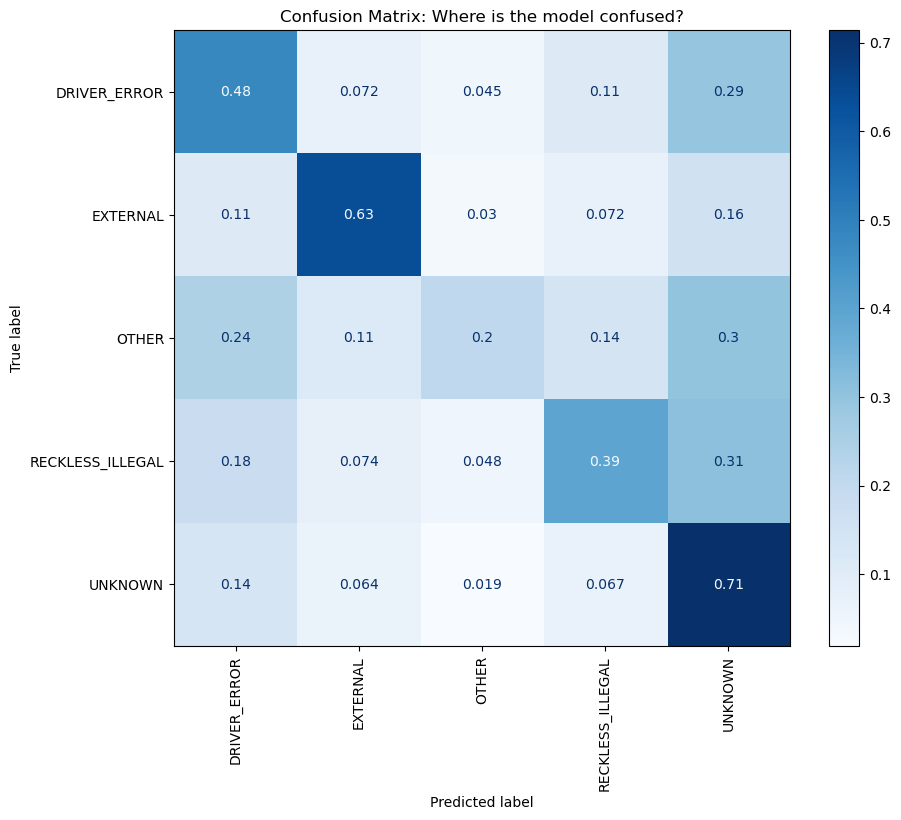

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Get predictions from Logistic Regression
# (Make sure 'log_pipeline' is still in memory from the previous step!)
y_pred = log_pipeline.predict(X_test)

# 2. Plot the Matrix
fig, ax = plt.subplots(figsize=(10, 8))

# This automatically grabs the class names from your model
cmp = ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred, 
    xticks_rotation='vertical',
    cmap='Blues',
    normalize='true', # Shows percentages (0.0 to 1.0) instead of raw counts
    ax=ax
)

plt.title("Confusion Matrix: Where is the model confused?")
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

# NOTE: We use the 'tree_preprocessor' (Ordinal) we created in the last step
# This gives the models dense numbers (1, 2, 3) instead of thousands of zeros.

# --- Model 1: Tuned Random Forest ---
rf_boosted = Pipeline(steps=[
    ('preprocessor', tree_preprocessor), # <--- Feeding it Dense Data!
    ('model', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,       # <--- Removing the limit! Let it learn deep patterns.
        min_samples_leaf=5,   # Stop it from memorizing noise
        class_weight=None,    # <--- The Accuracy Booster (Turn off balancing)
        n_jobs=-1,
        random_state=42
    ))
])

# --- Model 2: Tuned XGBoost Clone ---
xgb_boosted = Pipeline(steps=[
    ('preprocessor', tree_preprocessor),
    ('model', HistGradientBoostingClassifier(
        max_iter=200,         # Give it more time to learn
        learning_rate=0.1,
        max_depth=15,         # Go deeper
        class_weight=None,    # <--- The Accuracy Booster
        random_state=42
    ))
])

# --- Run the New Tournament ---
print(f"{'Model Name':<30} | {'Test Acc':<10}")
print("-" * 45)

# Train RF
rf_boosted.fit(X_train, y_train)
rf_score = rf_boosted.score(X_test, y_test)
print(f"{'Random Forest (Boosted)':<30} | {rf_score:.4f}")

# Train XGB
xgb_boosted.fit(X_train, y_train)
xgb_score = xgb_boosted.score(X_test, y_test)
print(f"{'XGBoost Clone (Boosted)':<30} | {xgb_score:.4f}")

Model Name                     | Test Acc  
---------------------------------------------
Random Forest (Boosted)        | 0.6353
XGBoost Clone (Boosted)        | 0.6376



 ANALYSIS: Random Forest (Boosted)
                  precision    recall  f1-score   support

    Driver Error       0.63      0.65      0.64     75665
External Factors       0.64      0.08      0.15      4873
           Other       0.54      0.11      0.18     18635
         Unknown       0.56      0.15      0.24     14423
  Vehicle Defect       0.65      0.83      0.73     91210

        accuracy                           0.64    204806
       macro avg       0.60      0.37      0.39    204806
    weighted avg       0.62      0.64      0.60    204806



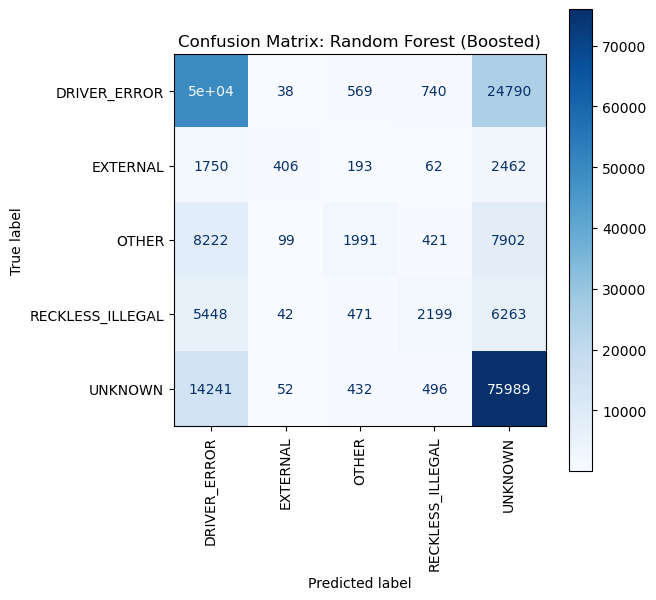


 ANALYSIS: XGBoost Clone (Boosted)
                  precision    recall  f1-score   support

    Driver Error       0.64      0.63      0.63     75665
External Factors       0.40      0.21      0.27      4873
           Other       0.54      0.17      0.26     18635
         Unknown       0.52      0.20      0.29     14423
  Vehicle Defect       0.65      0.83      0.73     91210

        accuracy                           0.64    204806
       macro avg       0.55      0.41      0.44    204806
    weighted avg       0.62      0.64      0.61    204806



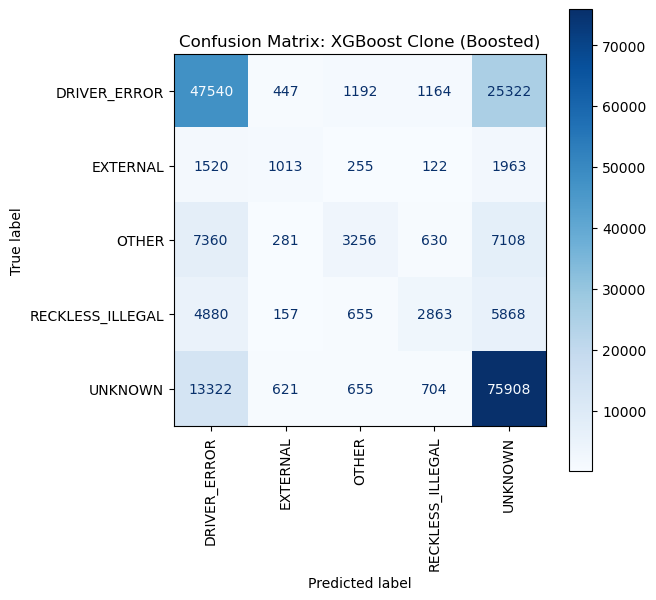


 ANALYSIS: logistic Regression
                  precision    recall  f1-score   support

    Driver Error       0.64      0.48      0.55     75665
External Factors       0.18      0.63      0.28      4873
           Other       0.39      0.20      0.27     18635
         Unknown       0.25      0.39      0.30     14423
  Vehicle Defect       0.66      0.71      0.69     91210

        accuracy                           0.56    204806
       macro avg       0.42      0.49      0.42    204806
    weighted avg       0.59      0.56      0.56    204806



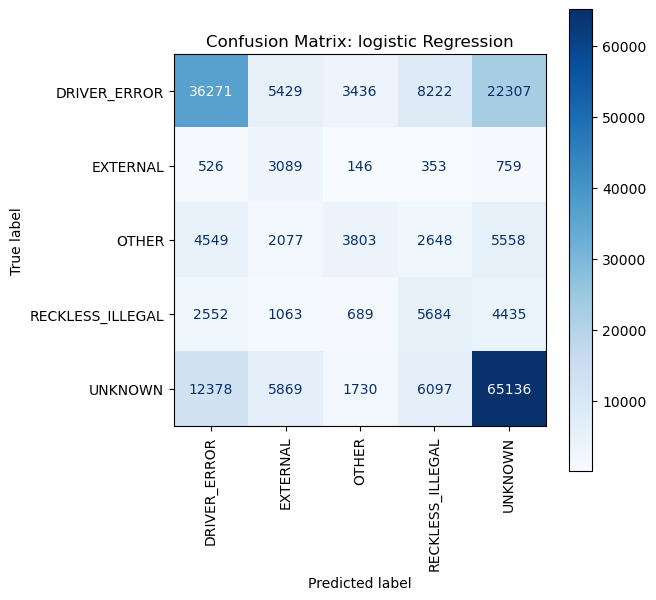


 ANALYSIS: rf_pipeline
                  precision    recall  f1-score   support

    Driver Error       0.59      0.48      0.53     75665
External Factors       0.14      0.73      0.23      4873
           Other       0.26      0.36      0.30     18635
         Unknown       0.24      0.39      0.29     14423
  Vehicle Defect       0.71      0.52      0.60     91210

        accuracy                           0.49    204806
       macro avg       0.39      0.50      0.39    204806
    weighted avg       0.58      0.49      0.52    204806



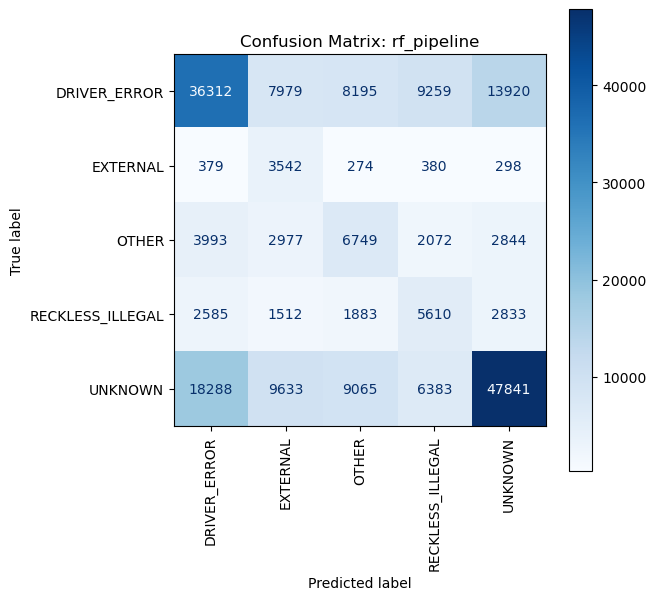


 ANALYSIS: dt_pipeline
                  precision    recall  f1-score   support

    Driver Error       0.60      0.45      0.51     75665
External Factors       0.13      0.71      0.22      4873
           Other       0.24      0.36      0.29     18635
         Unknown       0.25      0.38      0.30     14423
  Vehicle Defect       0.71      0.56      0.63     91210

        accuracy                           0.49    204806
       macro avg       0.39      0.49      0.39    204806
    weighted avg       0.58      0.49      0.52    204806



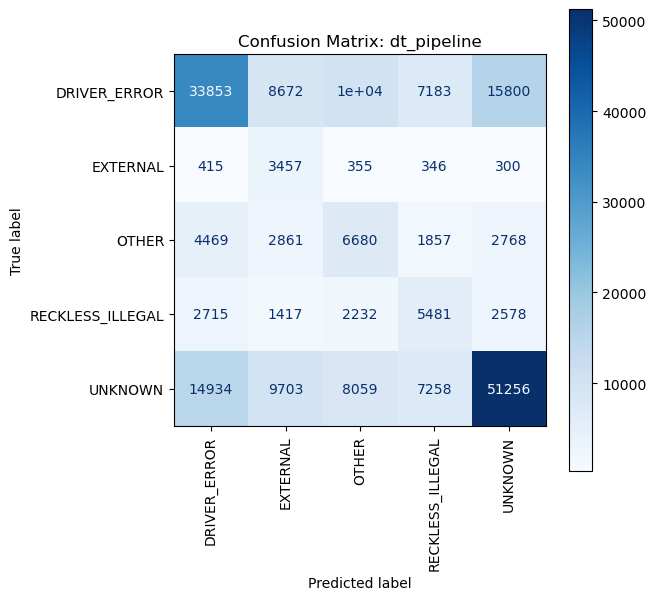


 ANALYSIS: xgb_clone_pipeline
                  precision    recall  f1-score   support

    Driver Error       0.67      0.44      0.54     75665
External Factors       0.16      0.71      0.26      4873
           Other       0.29      0.44      0.35     18635
         Unknown       0.26      0.46      0.34     14423
  Vehicle Defect       0.71      0.62      0.66     91210

        accuracy                           0.53    204806
       macro avg       0.42      0.54      0.43    204806
    weighted avg       0.62      0.53      0.55    204806



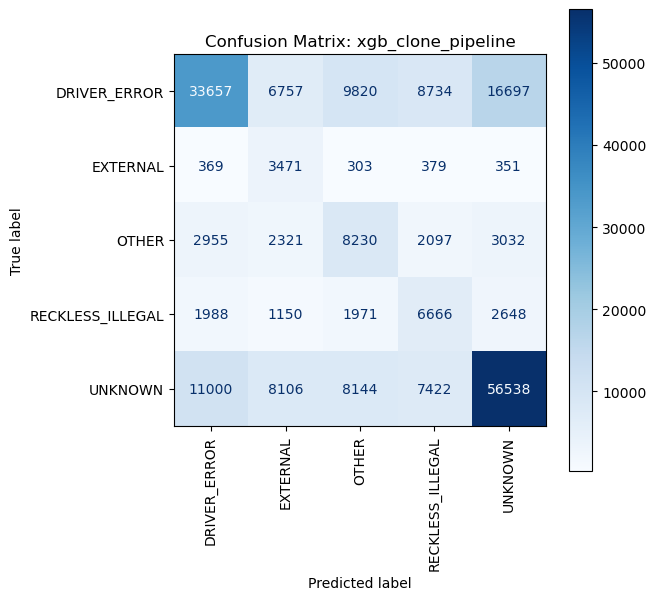

In [56]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Put both models in a dictionary so we can loop through them
models_to_analyze = {
    "Random Forest (Boosted)": rf_boosted,
    "XGBoost Clone (Boosted)": xgb_boosted,
    "logistic Regression": log_pipeline,
    "rf_pipeline": rf_pipeline,
    "dt_pipeline": dt_pipeline,
    "xgb_clone_pipeline": xgb_clone_pipeline
}

target_names = ['Driver Error', 'External Factors', 'Other', 'Unknown', 'Vehicle Defect']

# 2. Loop through each model
for name, model in models_to_analyze.items():
    print(f"\n{'='*40}")
    print(f" ANALYSIS: {name}")
    print(f"{'='*40}")

    # A. Generate Predictions
    preds = model.predict(X_test)

    # B. Print Text Report
    print(classification_report(y_test, preds, target_names=target_names))

    # C. Show Chart
    # We use a distinct plot for each iteration so they don't overlap
    fig, ax = plt.subplots(figsize=(6, 6))
    ConfusionMatrixDisplay.from_estimator(
        model, 
        X_test, 
        y_test, 
        cmap='Blues', 
        xticks_rotation='vertical',
        ax=ax
    )
    plt.title(f"Confusion Matrix: {name}")
    plt.show()